In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")
data_validation = pd.read_csv("validation.csv")
data_test = pd.read_csv("test.csv")
data_validation

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel16375,pixel16376,pixel16377,pixel16378,pixel16379,pixel16380,pixel16381,pixel16382,pixel16383,pixel16384
0,1,12,9,8,11,14,12,11,14,14,...,33,33,35,35,34,33,32,32,31,51
1,1,9,9,9,11,14,12,11,13,13,...,32,33,34,35,34,32,31,32,31,48
2,1,11,9,11,10,14,11,14,15,12,...,33,33,34,35,33,32,32,33,33,51
3,1,11,9,8,10,12,12,12,13,14,...,34,34,34,34,33,34,33,33,33,52
4,1,11,9,9,11,12,12,12,14,14,...,34,33,36,34,34,32,32,33,31,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,9,10,12,12,16,18,18,20,20,21,...,31,31,33,32,32,31,33,33,30,51
176,9,10,13,12,14,16,18,22,21,21,...,33,32,34,32,31,33,34,32,31,51
177,9,11,12,12,16,18,18,20,19,21,...,32,31,34,31,31,33,33,33,30,51
178,9,10,12,12,16,17,21,20,20,23,...,32,31,33,33,33,31,32,34,31,49


In [3]:
data = data.T
data_validation = data_validation.T
data_test = data_test.T
data

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
label,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9
pixel1,12,9,9,9,10,10,10,10,11,11,...,11,9,10,9,7,9,8,9,10,11
pixel2,9,8,8,8,9,10,8,9,9,9,...,10,12,11,11,12,11,12,13,10,12
pixel3,8,8,9,8,9,7,8,9,9,9,...,13,11,11,12,11,11,11,12,12,13
pixel4,11,10,10,10,11,11,11,11,11,11,...,12,14,12,11,12,13,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel16380,32,33,35,34,34,34,34,34,34,33,...,33,32,32,32,32,33,33,33,32,33
pixel16381,34,31,32,32,34,32,34,33,34,34,...,33,31,32,33,31,32,32,32,32,33
pixel16382,34,34,34,33,35,33,33,32,31,33,...,35,32,31,34,32,32,31,32,32,32
pixel16383,32,33,32,34,32,34,33,32,33,32,...,31,32,32,33,32,29,31,31,31,31


In [4]:
X_train = data[1:]
X_validation = data_validation[1:]
X_test = data_test[1:]
X_train = np.array(X_train.T)
X_validation = np.array(X_validation.T)
X_test = np.array(X_test.T)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1).astype("float32")
X_validation = X_validation.reshape(X_validation.shape[0], 128, 128, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1).astype("float32")
X_train /= 255
X_validation /= 255
X_test /= 255
X_train.shape

(900, 128, 128, 1)

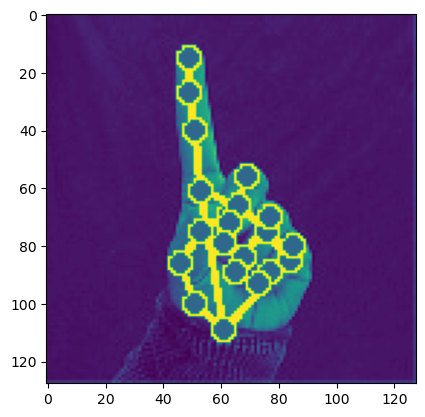

In [5]:
plt.imshow(X_train[0])
plt.show()

In [6]:
n_classes = 10
y_train = data.T["label"]
y_validation = data_validation.T["label"]
y_test = data_test.T["label"]
y_train = np.array(y_train)
y_validation = np.array(y_validation)
y_test = np.array(y_test)
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_validation = tf.keras.utils.to_categorical(y_validation, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_train[800]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 1)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(n_classes, activation="softmax")
])

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
8/8 [==============================] - 7s 431ms/step - loss: 2.5226 - accuracy: 0.5056 - val_loss: 0.2587 - val_accuracy: 0.8889
Epoch 2/10
8/8 [==============================] - 2s 250ms/step - loss: 0.1191 - accuracy: 0.9789 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 2s 248ms/step - loss: 0.0123 - accuracy: 0.9978 - val_loss: 4.2258e-04 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 2s 250ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 4.6670e-05 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 2s 245ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.1622e-05 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 2s 247ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.4113e-05 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 2s 249ms/step - loss: 0.0017 - accuracy: 0.9989 - val_loss: 3.6563e-05 - val_accuracy: 1.0000


In [9]:
model

In [21]:
X_test.shape

(180, 128, 128, 1)

In [16]:
z_predict = model.predict(X_test)
print(np.sum(z_predict.argmax(axis=1) == y_test.argmax(axis=1)) / len(y_test) * 100)
print(z_predict[0])
print(y_test[0])

6/6 [==============================] - 0s 21ms/step
100.0
[2.1441213e-08 9.9728227e-01 2.6031632e-03 1.4827135e-07 4.6977650e-08
 2.4755352e-07 1.0107353e-05 1.0275449e-04 2.2482789e-09 1.2289730e-06]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print(z_predict.argmax())
print(y_test.argmax())

202
1


In [17]:
model.save('my_model.h5')

In [18]:
from tensorflow.keras.models import load_model

In [19]:
new_model = load_model('my_model.h5')
new_model